In [22]:
# Import
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from random import choice
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim


In [4]:
# CPU support
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
# Download MNIST data
data = {
    'train' : datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
    ),
    'test' : datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
    ) 
}

print(data['train'])
print(data['test'])

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


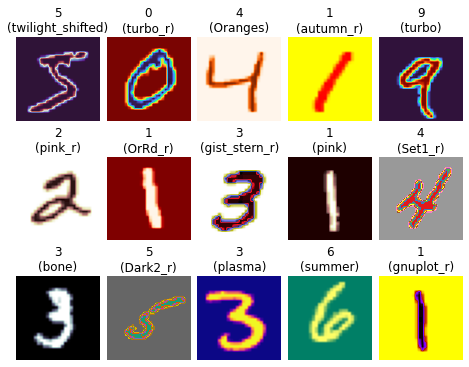

In [10]:
# Visualization of MNIST dataset

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(
    fig, 111, # Similar to subplot(111)
    nrows_ncols=(3, 5), # Create n by n grid of axes
    axes_pad=(0.1, 0.5), # Pad between axes in inch
)

cmaps = plt.colormaps()
for ax, idx in zip(grid, range(len(data['train']))):
    ax.axis('off')
    cmap = choice(cmaps)
    ax.imshow(data['train'].data[idx], cmap=cmap)
    ax.set_title(f'{data["train"].targets[idx].item()}\n({cmap})')
plt.show()

In [13]:
# Preparing data for training with DataLoaders
loaders = {
    'train' : DataLoader(data['train'], batch_size=100, shuffle=True, num_workers=1),
    'test'  : DataLoader(data['test'], batch_size=100, shuffle=False, num_workers=1)
}

In [47]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels  = 1,
                out_channels = 16,
                kernel_size  = 5,
                stride       = 1,
                padding      = 2,
            ),                              
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    
        )
        
        self.conv2 = nn.Sequential(         
            nn.Conv2d(
                in_channels  = 16,
                out_channels = 32,
                kernel_size  = 5,
                stride       = 1,
                padding      = 2,
            ),     
            nn.ReLU(),
            nn.MaxPool2d(2),                
        )
        
        # Fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # Flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # Return x for visualization

In [52]:
model = ConvNet().to(device)
# print(model)
next(model.parameters()).is_cuda # returns a boolean

# Define the Convolutional Neural Network model
# Study of kernel size
# Study of strid
# Study of number convolution layers
# Visualization of convolution layers

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [49]:
# Define loss function
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

https://www.youtube.com/watch?v=oPhxf2fXHkQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=13

https://github.com/python-engineer/pytorchTutorial/blob/master/13_feedforward.py

https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

In [35]:
from torch.autograd import Variable
n_epoch = 1
model.train()
for epoch in range(n_epoch):
    for batch, (images, labels) in enumerate(loaders['train']):
        print(images.is_cuda)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

KeyboardInterrupt: 